In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.shape

(400, 5)

In [8]:
df.describe(include=['object'])

,Gender
count,400
unique,2
top,Female
freq,204


In [12]:
print(df.duplicated().sum())

0


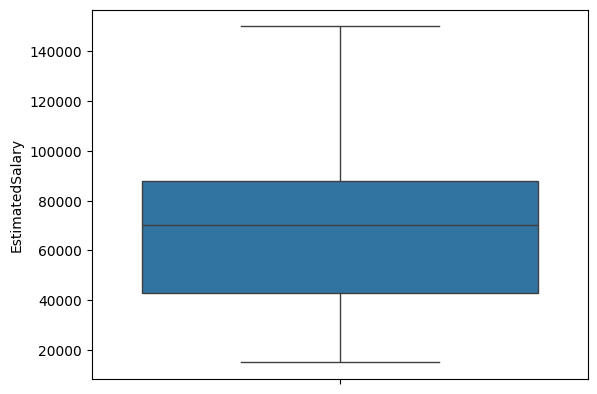

In [16]:
sns.boxplot(df['EstimatedSalary'])
plt.show()

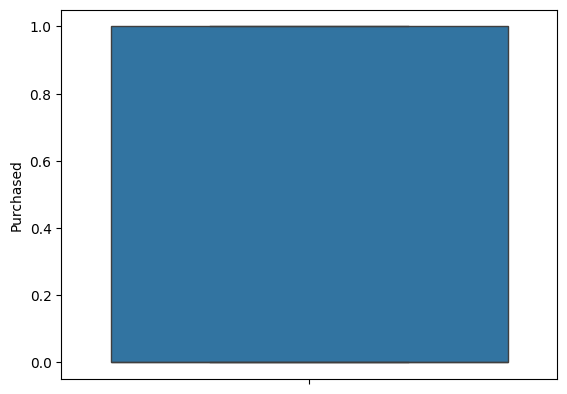

In [17]:
sns.boxplot(df['Purchased'])
plt.show()

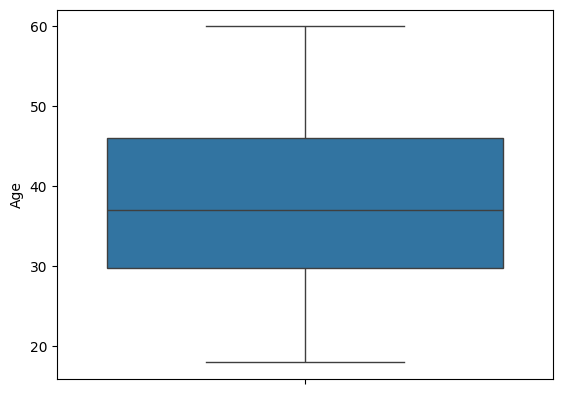

In [18]:
sns.boxplot(df['Age'])
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler,LabelEncoder

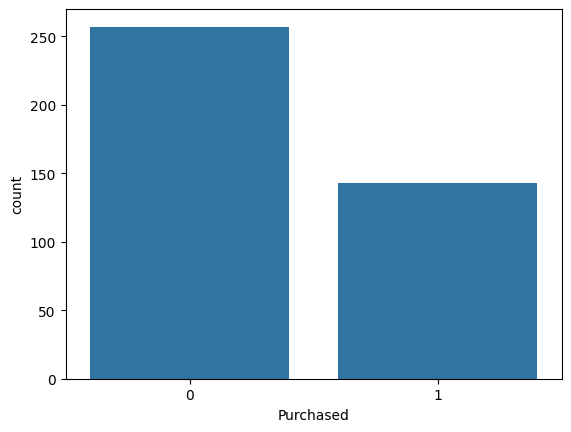

In [22]:
sns.countplot(x=df['Purchased'])
plt.show()

In [21]:
df['Purchased'].unique()

array([0, 1])

In [25]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
x = df.drop('Purchased', axis=1)
y = df['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [29]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8875

In [30]:
import sklearn.metrics
class_rep = sklearn.metrics.classification_report(y_test, y_pred)
class_rep

'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92        52\n           1       0.91      0.75      0.82        28\n\n    accuracy                           0.89        80\n   macro avg       0.90      0.86      0.87        80\nweighted avg       0.89      0.89      0.88        80\n'

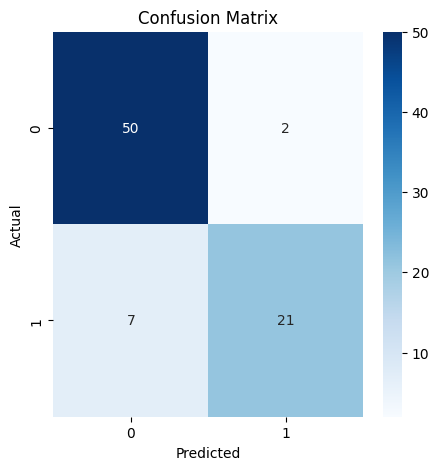

In [31]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt="d",cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier
# Assuming dataset is already loaded as 'dataset'
# Define features (X) and target (y)
X = df.iloc[:, 2:4].values  # Independent Variables
y = df.iloc[:, -1].values    # Target Variable

In [9]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Create and train the Decision Tree model
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
# Make predictions
y_pred = classifier.predict(X_test)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.79      0.86      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80



In [14]:
# Display Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[53  5]
 [ 3 19]]


<Axes: >

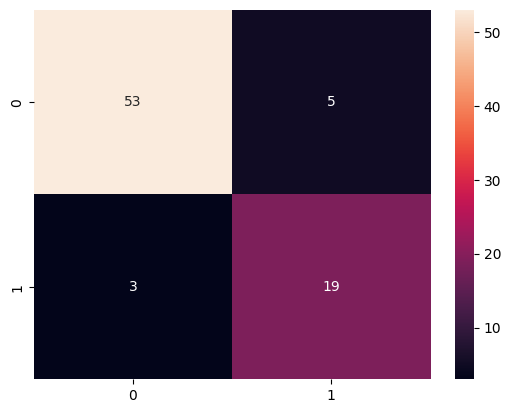

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [16]:
accuracy_score(y_test, y_pred)

0.9